Etapes d'exécution d'un projet ML

1. Cerner le problème
- Quel est l'objectif professionenel : **Une prédiction du prix médian des habitations dans un district** qui servira à alimenter un autre système d'apprentissage automatique
- Faire un etat de l'art
- De quel type d'apprentissage s'agit il? ( **supervisé**, non supervisé, renforcement, classification, regression simple, **régression multiple**,..?)
- Quelles techniques utilisées? (**hors ligne** ou en ligne)

2. Selectionner une mesure de performance
- Pour une regression, on utlise classiquement la racine carrée de l'erreur quadratique moyenne (RMSE). Elle donne une idée de l'importance des erreurs de prédictions comises par le système en surpondérant les erreurs importantes. 

3. Vérifier les hypothèses
Faire une liste des hypothèses et les vérifiers


4. Récupérer les données

import os 
import tarfile
import urllib

DOWNLOAD_ROOT= "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = "C:/Users/LNQP1128/Documents/Abdoul/python_ml"
HOUSING_URL = DOWNLOAD_ROOT + "C:/Users/LNQP1128/Documents/Abdoul/python_ml/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = "C:/Users/LNQP1128/Documents/Abdoul/python_ml/housing.tgz"
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = "C:/Users/LNQP1128/Documents/Abdoul/python_ml/housing.csv"
    return pd.read_csv(csv_path)

In [103]:
import pandas as pd
import tarfile

#tf = tarfile.TarFile("C:/Users/LNQP1128/Documents/Abdoul/python_ml/housing.tgz") 
#df = pd.read_csv(tf.open('housing.tgz'))

tgz_path = "C:/Users/LNQP1128/Documents/Abdoul/github/python_ml/housing.tgz"
#tgz_path= "C:/Users/abdou/Documents/python_ml/housing.tgz"
housing_tgz= tarfile.open(tgz_path)
housing_tgz.extractall()
 


5. Examiner les données

In [104]:
data = pd.read_csv("housing.csv")
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [105]:
df=data.copy()

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [107]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [108]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

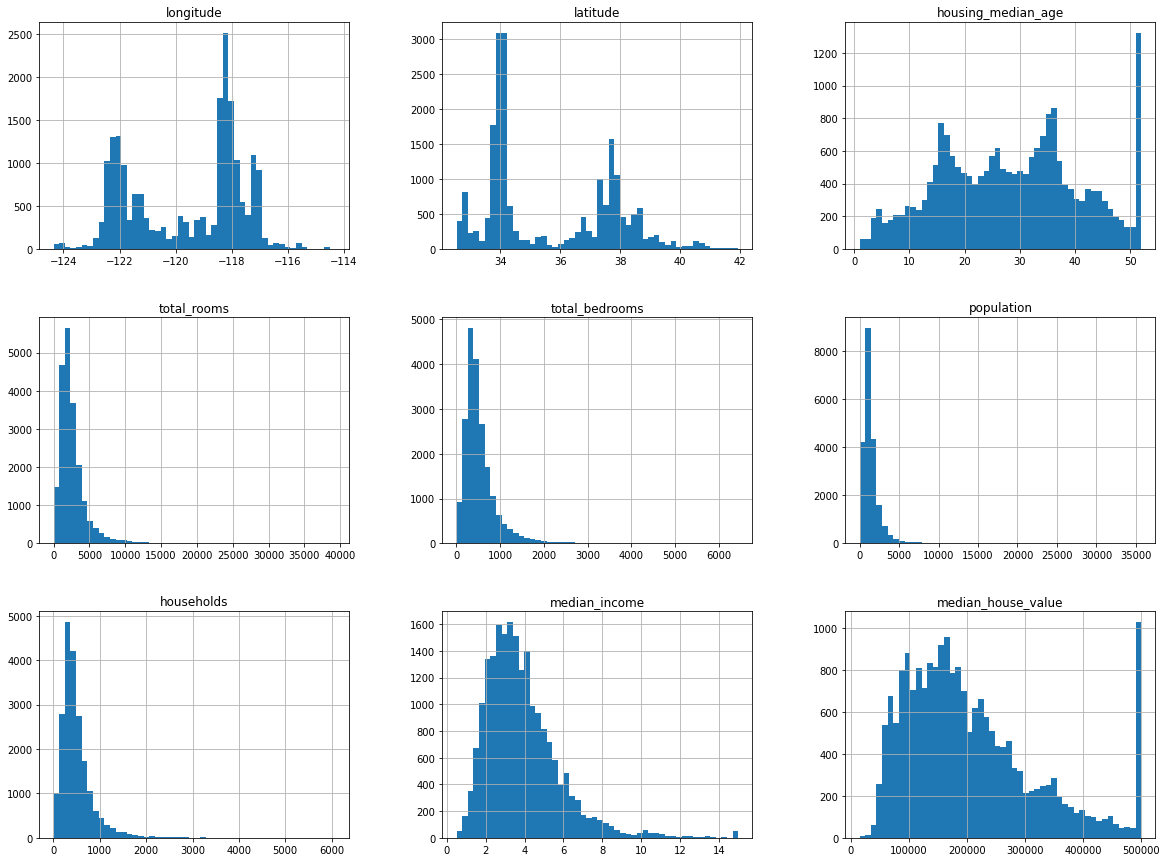

In [109]:
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))
plt.show()

6. Créer les données de test

- En écrivant une fonction

In [110]:
import numpy as np

def split_train_test(df,test_ratio):
    shuffled_indices=np.random.permutation(len(df))
    test_set_size=int(len(df)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return df.iloc[train_indices],df.iloc[test_indices]


In [111]:
train_set,test_set=split_train_test(df,0.2)

In [112]:
len(train_set)

16512

In [113]:
train_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
9958     -122.33     38.39                36.0        831.0           122.0   
19490    -120.99     37.66                46.0       1750.0           347.0   
13800    -117.36     34.54                 7.0       3940.0           764.0   
4692     -118.36     34.07                52.0       2046.0           451.0   
16850    -122.42     37.62                40.0       1545.0           264.0   
...          ...       ...                 ...          ...             ...   
16012    -122.47     37.74                52.0       2055.0           265.0   
19514    -121.03     37.62                46.0       2331.0           508.0   
5975     -117.77     34.10                50.0       2388.0           494.0   
14253    -117.10     32.71                29.0       3422.0           713.0   
5071     -118.31     33.99                49.0        857.0           196.0   

       population  households  median_income  median_house_value  \
9958        272.0       109.0         6.3427            304800.0   
19490       754.0       356.0         2.9137            106000.0   
13800      2140.0       711.0         3.0357             91300.0   
4692        944.0       435.0         3.4265            456900.0   
16850       756.0       282.0         4.4643            308100.0   
...           ...         ...            ...                 ...   
16012       735.0       252.0         8.1189            500001.0   
19514      1210.0       484.0         2.5313             77700.0   
5975       1241.0       459.0         2.8818            167200.0   
14253      2775.0       644.0         1.7075             86900.0   
5071        694.0       228.0         2.8950            108000.0   

      ocean_proximity  
9958           INLAND  
19490          INLAND  
13800          INLAND  
4692        <1H OCEAN  
16850      NEAR OCEAN  
...               ...  
16012        NEAR BAY  
19514          INLAND  
5975           INLAND  
14253      NEAR OCEAN  
5071        <1H OCEAN  

[16512 rows x 10 columns]

In [114]:
len(test_set)

4128

In [115]:
test_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
15958    -122.46     37.71                47.0       1527.0           283.0   
20608    -121.59     39.10                24.0       1107.0           261.0   
1537     -122.04     37.90                20.0       5467.0          1044.0   
1421     -122.06     37.99                17.0       1319.0           316.0   
14434    -117.23     32.80                28.0       3379.0           918.0   
...          ...       ...                 ...          ...             ...   
10820    -117.92     33.65                15.0       1309.0           477.0   
10469    -117.72     33.53                14.0       1672.0           295.0   
12661    -121.42     38.51                15.0       7901.0          1422.0   
12447    -114.49     33.97                17.0       2809.0           635.0   
13830    -117.25     34.51                 7.0       3200.0           477.0   

       population  households  median_income  median_house_value  \
15958      1102.0       282.0         4.0000            231600.0   
20608       768.0       205.0         1.7167             48800.0   
1537       2310.0       963.0         5.6986            275800.0   
1421        384.0       269.0         1.8229            137500.0   
14434      1849.0       849.0         3.0293            241700.0   
...           ...         ...            ...                 ...   
10820      1330.0       424.0         3.4417            182500.0   
10469       704.0       293.0         5.1129            251300.0   
12661      4769.0      1418.0         2.8139             90400.0   
12447        83.0        45.0         1.6154             87500.0   
13830      1522.0       470.0         4.6914            142200.0   

      ocean_proximity  
15958      NEAR OCEAN  
20608          INLAND  
1537         NEAR BAY  
1421         NEAR BAY  
14434      NEAR OCEAN  
...               ...  
10820       <1H OCEAN  
10469       <1H OCEAN  
12661          INLAND  
12447          INLAND  
13830          INLAND  

[4128 rows x 10 columns]

- Pour éviter la variation des données à chaque rafraichissement, quand les données ont des identificateurs.(Ce qui n'est pas le cas ici)

In [116]:
from zlib import crc32
def test_set_check(id, test_ratio):
    return crc32(np.int64(id))& 0xffffffff < test_ratio*2**32

def split_train_test_by_id(data,test_ratio,id_column):
    ids=data[id_column]
    in_test_set=ids.apply(lambda id_: test_set_check(id_,test_ratio))
    return data.loc[~in_test_set],data.loc[in_test_set]

- En utilisant les indices de lignes comme identificateur

In [117]:
housing_with_id=df.reset_index() #ajout d'une colonne 'index'
train_set,test_set=split_train_test_by_id(housing_with_id,0.2,"index")

- En utilisant des variables stables pour construire un identificateur. Ici par exemple, on peut utiliser la longitude et la latitude

In [118]:
housing_with_id["id"]=df["longitude"]*1000 + df["latitude"]
train_set,test_set=split_train_test_by_id(housing_with_id,0.2,"id")

- En utilisant les fonctions de scikit-LeafPattern

In [119]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(df,test_size=0.2,random_state=42)

In [120]:
train_set


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196    -117.03     32.71                33.0       3126.0           627.0   
8267     -118.16     33.77                49.0       3382.0           787.0   
17445    -120.48     34.66                 4.0       1897.0           331.0   
14265    -117.11     32.69                36.0       1421.0           367.0   
2271     -119.80     36.78                43.0       2382.0           431.0   
...          ...       ...                 ...          ...             ...   
11284    -117.96     33.78                35.0       1330.0           201.0   
11964    -117.43     34.02                33.0       3084.0           570.0   
5390     -118.38     34.03                36.0       2101.0           569.0   
860      -121.96     37.58                15.0       3575.0           597.0   
15795    -122.42     37.77                52.0       4226.0          1315.0   

       population  households  median_income  median_house_value  \
14196      2300.0       623.0         3.2596            103000.0   
8267       1314.0       756.0         3.8125            382100.0   
17445       915.0       336.0         4.1563            172600.0   
14265      1418.0       355.0         1.9425             93400.0   
2271        874.0       380.0         3.5542             96500.0   
...           ...         ...            ...                 ...   
11284       658.0       217.0         6.3700            229200.0   
11964      1753.0       449.0         3.0500             97800.0   
5390       1756.0       527.0         2.9344            222100.0   
860        1777.0       559.0         5.7192            283500.0   
15795      2619.0      1242.0         2.5755            325000.0   

      ocean_proximity  
14196      NEAR OCEAN  
8267       NEAR OCEAN  
17445      NEAR OCEAN  
14265      NEAR OCEAN  
2271           INLAND  
...               ...  
11284       <1H OCEAN  
11964          INLAND  
5390        <1H OCEAN  
860         <1H OCEAN  
15795        NEAR BAY  

[16512 rows x 10 columns]

In [121]:
test_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20046    -119.01     36.06                25.0       1505.0             NaN   
3024     -119.46     35.14                30.0       2943.0             NaN   
15663    -122.44     37.80                52.0       3830.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   
9814     -121.93     36.62                34.0       2351.0             NaN   
...          ...       ...                 ...          ...             ...   
15362    -117.22     33.36                16.0       3165.0           482.0   
16623    -120.83     35.36                28.0       4323.0           886.0   
18086    -122.05     37.31                25.0       4111.0           538.0   
2144     -119.76     36.77                36.0       2507.0           466.0   
3665     -118.37     34.22                17.0       1787.0           463.0   

       population  households  median_income  median_house_value  \
20046      1392.0       359.0         1.6812             47700.0   
3024       1565.0       584.0         2.5313             45800.0   
15663      1310.0       963.0         3.4801            500001.0   
20484      1705.0       495.0         5.7376            218600.0   
9814       1063.0       428.0         3.7250            278000.0   
...           ...         ...            ...                 ...   
15362      1351.0       452.0         4.6050            263300.0   
16623      1650.0       705.0         2.7266            266800.0   
18086      1585.0       568.0         9.2298            500001.0   
2144       1227.0       474.0         2.7850             72300.0   
3665       1671.0       448.0         3.5521            151500.0   

      ocean_proximity  
20046          INLAND  
3024           INLAND  
15663        NEAR BAY  
20484       <1H OCEAN  
9814       NEAR OCEAN  
...               ...  
15362       <1H OCEAN  
16623      NEAR OCEAN  
18086       <1H OCEAN  
2144           INLAND  
3665        <1H OCEAN  

[4128 rows x 10 columns]

7. Decoupage des revenues en sous groupes(strates)

In [122]:
df["income_cat"]=pd.cut(df["median_income"],bins=[0.,1.5,3.0,4.5,6.,np.Inf],labels=[1,2,3,4,5])

In [123]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity income_cat  
0            NEAR BAY          5  
1            NEAR BAY          5  
2            NEAR BAY          5  
3            NEAR BAY          4  
4            NEAR BAY          3  
...               ...        ...  
20635          INLAND          2  
20636          INLAND          2  
20637          INLAND          2  
20638          INLAND          2  
20639          INLAND          2  

[20640 rows x 11 columns]

<AxesSubplot:>

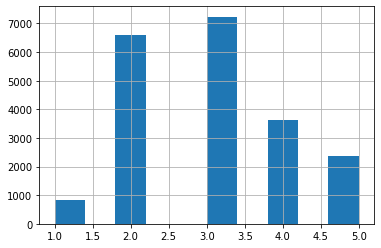

In [124]:
df["income_cat"].hist()

8. Echantillonage stratifié en se basant sur les tranches de revenues obtenues

In [125]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index,test_index in split.split(df,df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set=df.loc[test_index]

In [126]:
strat_test_set["income_cat"].value_counts()/len(strat_train_set)

3    0.087633
2    0.079700
4    0.044089
5    0.028585
1    0.009993
Name: income_cat, dtype: float64

- **On constate qu'il y a moins de biais avec l'échantillonage stratifé**

10. Suppression de la colonne income_cat (colonne des strates)

In [127]:
for set_ in (strat_test_set,strat_train_set):
    set_.drop("income_cat",axis=1, inplace=True)

In [128]:
housing_with_id

index  longitude  latitude  housing_median_age  total_rooms  \
0          0    -122.23     37.88                41.0        880.0   
1          1    -122.22     37.86                21.0       7099.0   
2          2    -122.24     37.85                52.0       1467.0   
3          3    -122.25     37.85                52.0       1274.0   
4          4    -122.25     37.85                52.0       1627.0   
...      ...        ...       ...                 ...          ...   
20635  20635    -121.09     39.48                25.0       1665.0   
20636  20636    -121.21     39.49                18.0        697.0   
20637  20637    -121.22     39.43                17.0       2254.0   
20638  20638    -121.32     39.43                18.0       1860.0   
20639  20639    -121.24     39.37                16.0       2785.0   

       total_bedrooms  population  households  median_income  \
0               129.0       322.0       126.0         8.3252   
1              1106.0      2401.0      1138.0         8.3014   
2               190.0       496.0       177.0         7.2574   
3               235.0       558.0       219.0         5.6431   
4               280.0       565.0       259.0         3.8462   
...               ...         ...         ...            ...   
20635           374.0       845.0       330.0         1.5603   
20636           150.0       356.0       114.0         2.5568   
20637           485.0      1007.0       433.0         1.7000   
20638           409.0       741.0       349.0         1.8672   
20639           616.0      1387.0       530.0         2.3886   

       median_house_value ocean_proximity         id  
0                452600.0        NEAR BAY -122192.12  
1                358500.0        NEAR BAY -122182.14  
2                352100.0        NEAR BAY -122202.15  
3                341300.0        NEAR BAY -122212.15  
4                342200.0        NEAR BAY -122212.15  
...                   ...             ...        ...  
20635             78100.0          INLAND -121050.52  
20636             77100.0          INLAND -121170.51  
20637             92300.0          INLAND -121180.57  
20638             84700.0          INLAND -121280.57  
20639             89400.0          INLAND -121200.63  

[20640 rows x 12 columns]

10. Exploration des données

- Copie des données d'entrainement

In [129]:
housing=strat_train_set.copy()

- Observation des données géographiques

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

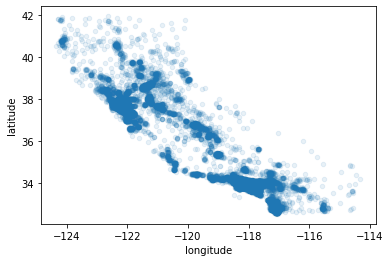

In [130]:
#cartographie des données
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)
#Les Zones à forte densité sont plus foncées

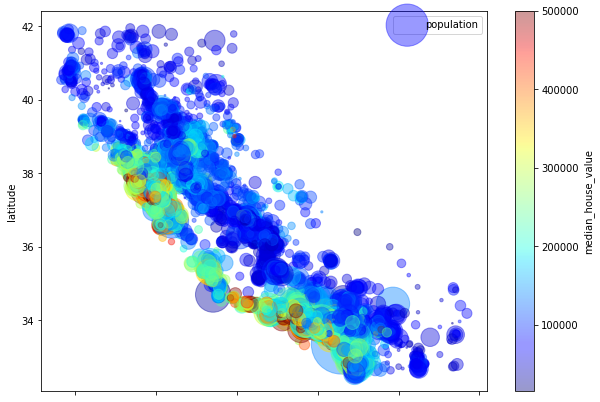

In [131]:
#Prix du mobilier
from cProfile import label


housing.plot(kind="scatter", x="longitude",y="latitude", alpha=0.4,
s=housing["population"]/10, label="population",figsize=(10,7),
c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

11. Recherche de corrélations

In [132]:
corr_matrix=housing.corr()
corr_matrix

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105823     0.048909   
latitude            -0.924478  1.000000            0.005737    -0.039245   
housing_median_age  -0.105823  0.005737            1.000000    -0.364535   
total_rooms          0.048909 -0.039245           -0.364535     1.000000   
total_bedrooms       0.076686 -0.072550           -0.325101     0.929391   
population           0.108071 -0.115290           -0.298737     0.855103   
households           0.063146 -0.077765           -0.306473     0.918396   
median_income       -0.019615 -0.075146           -0.111315     0.200133   
median_house_value  -0.047466 -0.142673            0.114146     0.135140   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076686    0.108071    0.063146      -0.019615   
latitude                 -0.072550   -0.115290   -0.077765      -0.075146   
housing_median_age       -0.325101   -0.298737   -0.306473      -0.111315   
total_rooms               0.929391    0.855103    0.918396       0.200133   
total_bedrooms            1.000000    0.876324    0.980167      -0.009643   
population                0.876324    1.000000    0.904639       0.002421   
households                0.980167    0.904639    1.000000       0.010869   
median_income            -0.009643    0.002421    0.010869       1.000000   
median_house_value        0.047781   -0.026882    0.064590       0.687151   

                    median_house_value  
longitude                    -0.047466  
latitude                     -0.142673  
housing_median_age            0.114146  
total_rooms                   0.135140  
total_bedrooms                0.047781  
population                   -0.026882  
households                    0.064590  
median_income                 0.687151  
median_house_value            1.000000

In [133]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

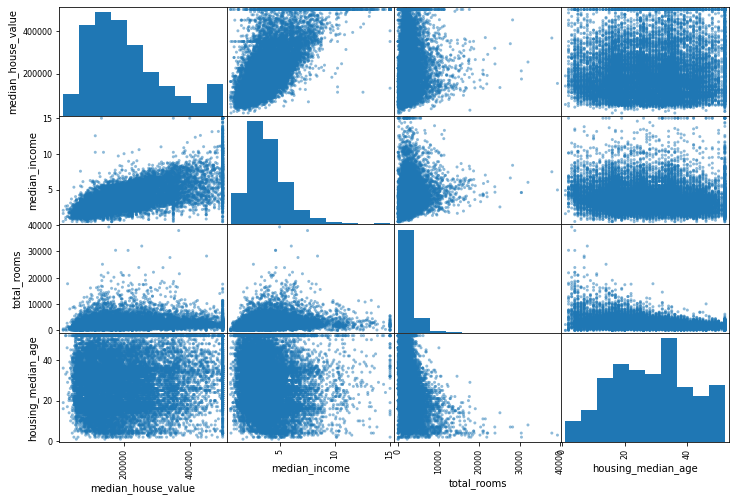

In [134]:
from pandas.plotting import scatter_matrix
attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

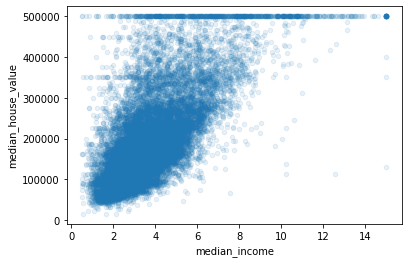

In [135]:
#Il y a une forte corrélation entre le prix médian des maison et les revenus medians
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

- Analyse de nouvelles variables(en combinant certaines variables existantes)

In [136]:
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]


In [137]:
corr_matrix=housing.corr()

In [138]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [139]:
# bedrooms_per_room  nous insforme que les logements les plus chers ont moins de pièces         

12. Préparation des données pour les algorithmes d'apprentissage automatique

In [140]:

housing= strat_train_set.drop("median_house_value",axis=1)
housing_labels=strat_train_set["median_house_value"].copy()

13. Nettoyage des données

In [141]:
# Suppression les observations contenant des valeurs nan
#housing.dropna(subset=["total_bedrooms"])
# Suppression des variables contenant des valeurs nan
#housing.drop("total_bedrooms",axis=1)
# Remplacement des valeurs manquantes par zero
#housing["total_bedrooms"].fillna(median, inplace=True)

In [142]:
# Gestion des valeur manquantes avec scitkitlearn
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")

In [143]:
# imputer s'applique sur des valeur quantitatives, donc on supprime les valeur qualitatives
housing_num=housing.drop("ocean_proximity",axis=1)

In [144]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [145]:
# imputer stocke les valeurs medianes calculées dans statistics_
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [146]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [147]:
#imputer est entrainé et peux être utilisé pour remplacer les valeurs manquantes de la dataset
X=imputer.transform(housing_num)

In [148]:
# Réinjection dans une dataframe
housing_tr=pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)

In [149]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


14. Gestion des variables qualitatives

In [150]:
housing_cat=housing[["ocean_proximity"]]
housing_cat.head(10)

ocean_proximity
12655          INLAND
15502      NEAR OCEAN
2908           INLAND
14053      NEAR OCEAN
20496       <1H OCEAN
1481         NEAR BAY
18125       <1H OCEAN
5830        <1H OCEAN
17989       <1H OCEAN
4861        <1H OCEAN

- Transformation en valeur numériques

In [151]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [152]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [153]:
# Les algo ont tendance à considérer les valeurs proches comme similaire, ce qui n'est pas le cas ici. 1 et 2 sont différents tandis que 1 et 4 sont plus proches
# la solution est de créer une variable binaire par modalité(codage disjonctif complet en stat)

from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot  #Le resultat est une matrice creuse

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [154]:
# Pour transformer en tableau numpy
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [155]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

- Transformateur sur meésure 

In [156]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix=3,4,5,6
class CombineAttributeAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True): # ni *args ni *kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, Y=None):
        return self #Rien d'autre à écrire
    def transform(self, X, Y=None):
        rooms_per_household= X[:, rooms_ix] / X[:,households_ix]
        population_per_household= X[:,population_ix]/ X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room= X[:, bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]
attr_adder= CombineAttributeAdder(add_bedrooms_per_room=False)
housing_extra_attribs=attr_adder.transform(housing.values)

14. Recalibrage des variables

In [157]:
# Transformation très inmportante(features scaling)
# Permet de mettre les variables aux mêmes échelles

- Méthode MinMaxScaler

- Méthode StandardScaler

- Pipelines de transformation

In [158]:
# Oraganisation des tâches de transformations
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombineAttributeAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr=num_pipeline.fit_transform(housing_num)


- Utilisation de la méthode ColumnTransformer pour transformer toute la dataset sans séparer entrées et target

In [159]:
from sklearn.compose import ColumnTransformer
num_attribs=list(housing_num)
cat_attribs=["ocean_proximity"]
full_pipepline= ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("cat",OneHotEncoder(),cat_attribs),
])
housing_prepared=full_pipepline.fit_transform(housing)

15. Entrainement

In [160]:
# Entrainement du modèle de regression linéaire
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [161]:
some_data= housing.iloc[:5]
some_labels= housing_labels.iloc[:5]
some_data_prepared= full_pipepline.transform(some_data)
print("prédictions:",lin_reg.predict(some_data_prepared))

prédictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [162]:
print("Etiquettes:",list(some_labels))

Etiquettes: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [163]:
# Calcul de RMSE
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_rmse= mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_rmse)
lin_rmse*100/265000

25.897310905731114

In [164]:
# Une marche d'erreur de 25% n'est pas assez bon comme resultat

In [165]:
#Utlisation d'un modèle plus puissant: DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor()

In [166]:
#Evaluation du modèle
housing_predictions=tree_reg.predict(housing_prepared)
tree_rmse=mean_squared_error(housing_predictions,housing_labels)
tree_rmse=np.sqrt(tree_rmse)
tree_rmse

0.0

In [167]:
# Ce modèle est il parfait?

In [168]:
# Vérification par la validation croisée
#sans utiliser les véritables données de test
#k=10
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg,housing_prepared,housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores=np.sqrt(-scores)

In [169]:
# Examinons les résultats
def display_scores(scores):
    print("scores:",scores*100/265000)
    print("Moyenne:",scores.mean())
    print("Ecart-type:",scores.std())

In [170]:
display_scores(tree_rmse_scores)

scores: [27.4368063  26.42130481 26.00419906 27.39826982 26.78266482 29.01946332
 26.93425699 27.40293538 25.44604763 26.59099959]
Moyenne: 71400.79114726972
Ecart-type: 2445.8248823506146


In [171]:
# Vérifions les scores sur le modèle de regression linéaire
lin_scores=cross_val_score(lin_reg,housing_prepared,housing_labels,
                            scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores=np.sqrt(-lin_scores)

In [172]:
display_scores(lin_rmse_scores)

scores: [27.08028817 24.19433648 25.57402688 25.90007197 25.22495883 27.36907066
 27.9234266  25.96314577 25.07293901 26.46784877]
Moyenne: 69104.07998247063
Ecart-type: 2880.3282098180675


In [173]:
# Utilisation du modèle randomforestregressor
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)
forest_rmse= mean_squared_error(housing_predictions,housing_labels)
forest_rmse=np.sqrt(forest_rmse)
forest_rmse

0.0

In [174]:
forest_scores= cross_val_score(forest_reg,housing_prepared,housing_labels,
                            scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores=np.sqrt(-forest_scores)

In [175]:
display_scores(forest_rmse_scores)

scores: [19.27906654 18.3520063  17.73193264 19.62157225 17.91924623 19.46995276
 19.78081733 18.74179962 18.37940936 20.47927227]
Moyenne: 50285.094952448264
Ecart-type: 2236.814857594111


In [102]:
# On constate que les données d'entrainement sont surajustées


16. Reglage du modèle

- Reglage avec précision

In [176]:
# Avec une liste restreinte de modèle

- Recherche par quadrillage

In [ ]:
# GridSearchCV